# интернет-магазине «Стримчик»

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Шаг 1. Изучим общую информацию

In [2]:
data = pd.read_csv('/datasets/games.csv')
display(data.head(10))
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Шаг 2. Подготока данных

Переименуем столбцы в соответствии с стилем snake_case.

In [3]:
data = data.rename(columns ={'Name':'name', 'Platform':'platform', 'Year_of_Release':'year_of_release', 'Genre':'genre',
                      'NA_sales':'na_sales', 'EU_sales':'eu_sales', 'JP_sales':'jp_sales', 'Other_sales':'other_sales',
                     'Critic_Score':'critic_score', 'User_Score':'user_score', 'Rating':'rating'})


Посмотрим колличество пропусков.

In [4]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Заменим пропуски в калонках name и genre на пустые строки, остальные пропуски оставим без изменения так как это может иказить результаты дальнейших исследований. 
Пропуски в столбце с оценкой критиков могли появиться в следствии того что обзоров на некоторые игры не делали по причинам не актуальности. Так же игровая журналистика появилась не так давно как игры. Ещё нельзя забывать что и такого количества агригаторов оценок да и вообще ресурсов где могли быть размещены оценки не было, а когда то их и не было вовсе. Аналогичными причинами можно описат и пропуски в колонке с оценками пользователей. 
Пропуски в столбце с рейтингом можно объяснить тем что сама организация Entertainment Software Rating Board (ESRB) появилась только в 1994 году. Так же эта организация действует в США и Канаде и игры не выходившие в этих странах могли не проходить оценку.

In [5]:
data = data.fillna({'name':' ', 'genre':' '})

Приведём знечения в столбце year_of_release к типу int.
Заменим значения tbd('To Be Determined' что значит что не оценки не определены ) в столбце user_score на NaN, что бы они не мешели в дальнейшем, иак де приведём данные к типу данных Float

In [6]:
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

data['user_score'] = pd.to_numeric(data['user_score']).astype('Float64')

Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

In [7]:
data['all_sales'] = data['eu_sales'] + data['jp_sales'] + data['other_sales'] + data['na_sales']

Попробуем определить наличие дубликатов по связке колонок name и platform

In [8]:
data[data.duplicated(subset=['name','platform'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E,2.56
659,,GEN,1993,,1.78,0.53,0.00,0.08,NaN,<NA>,NaN,2.39
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+,1.17
4127,Sonic the Hedgehog,PS3,<NA>,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+,0.48
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T,0.08
14244,,GEN,1993,,0.00,0.00,0.03,0.00,NaN,<NA>,NaN,0.03
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E,0.01


Из полученных данных видим что что есть задвоение а именно  "Madden NFL 13", "Sonic the Hedgehog", а так же игра без наименования. Просто удалим дублированные значения добавив в subset колоку с годом релиза, оставим только первые в списке так как они более похожи на правду тогда как вторые почти не садержат информации и в данном случае не повлияют на ход исследований. "Sonic the Hedgehog" удалим в ручную.

In [9]:
data = data.drop_duplicates(subset=['name','platform','year_of_release'],keep='first', inplace=False) #удаляем дубли

data = data.drop(axis=0, index=4127) #удалим строку с данными по игре "Sonic the Hedgehog"

## Шаг 3. Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы и как изменялись продажи. 

(1979.0, 2017.0)

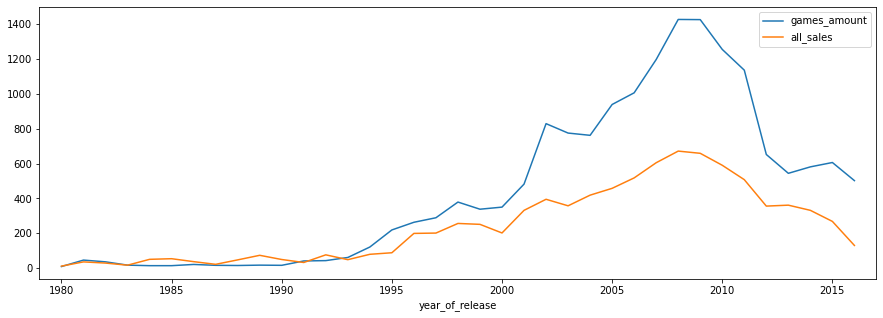

In [10]:
# Создадим сводную таблицу
sales_games_years = data.pivot_table(index=['year_of_release'], values=['name','all_sales'],
                                     aggfunc={'name':'count', 'all_sales':'sum'})

sales_games_years = sales_games_years.rename(columns = {'name':'games_amount'}) #переименуем для наглядности 

sales_games_years.plot( y=['games_amount','all_sales'],figsize=(15,5))  
plt.xlim(1979,2017)


С 1995 г. наблюдается рост количества игр и ещё больший рост продаж , однако в 2009 тенденция меняется в обратную сторону.

Определим топ5 платформ за всё время и определим  как менялись продажи по платформам. Выберим платформы с наибольшими
суммарными продажами и пострим распределение по годам,за какой характерный срок появляются новые и исчезают старые платформы.

,all_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.16
Wii,907.51
DS,806.12


(1999.0, 2017.0)

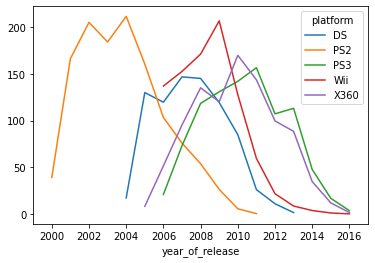

In [11]:
#Создадим сводную таблицу 
sales_platforms_years = data.pivot_table(index=['year_of_release'], columns=['platform'], values=['all_sales'], 
                                     aggfunc=('sum'))
#Определяем топ5 платформ
sales_top_platforms = data.pivot_table(index=['platform'], values=['all_sales'], aggfunc=('sum')).sort_values(by=['all_sales'],
                                                                                                             ascending = False)
display(sales_top_platforms.head(5))

#Построим наглядный график
top_sales_platforms_years = data.loc[data['platform'].isin(['PS2','X360','PS3','Wii','DS'])].pivot_table(index=['year_of_release'],
                                                                                                     columns=['platform'], 
                                                                                                     values=['all_sales'], 
                                                                                                     aggfunc=('sum'))
top_sales_platforms_years.plot(y='all_sales')


plt.xlim(1999,2017)



Срок жизни платформ примерно 10 лет , оставим данные только за актуальный период.

In [12]:
data_cut = data[data['year_of_release'] >= 2014] #создадим новый dataframe с актуальными данными

Посмотрим наиболее актуальные платформы.

(2014.0, 2016.0)

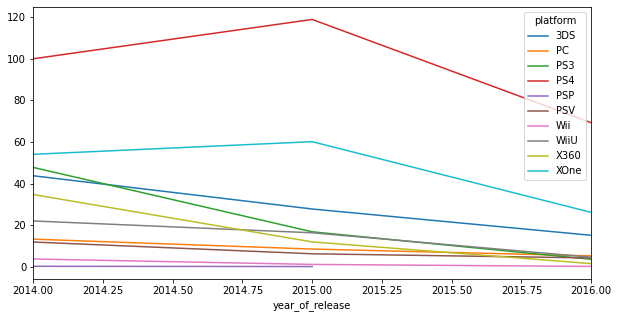

In [13]:
#создадим сводную таблицу
sales_platforms_years = data_cut.pivot_table(index=['year_of_release'], columns=['platform'], values=['all_sales'], 
                                     aggfunc=('sum'))
#составим график изменения продаж с теченим времяни по платформам 
sales_platforms_years.plot(y='all_sales',figsize=(10,5))
plt.xlim(2014,2016)

Продажи игр на всех платформах снижаются, наиболее актуальные на данный момент PS4, Xone, 3DS.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

(0.0, 1.0)

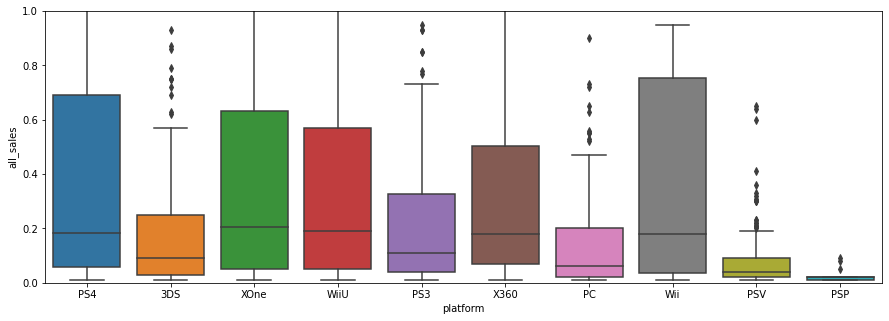

In [14]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data_cut, x='platform', y='all_sales')
plt.ylim(0,1)

In [15]:
describe_data = data_cut.pivot_table(index='name', columns='platform', values='all_sales')
describe_data.describe()

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,212.000000,151.000000,219.000000,376.000000,13.000000,295.000000,11.000000,73.000000,111.000000,228.000000
mean,0.408868,0.179139,0.311324,0.766356,0.027692,0.075932,0.460909,0.588767,0.434414,0.615614
std,1.188368,0.329359,0.633059,1.614969,0.027735,0.141591,0.625451,1.161467,0.628967,1.046513
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.030000,0.020000,0.040000,0.057500,0.010000,0.020000,0.035000,0.050000,0.070000,0.050000
50%,0.090000,0.060000,0.110000,0.185000,0.020000,0.040000,0.180000,0.190000,0.180000,0.205000
75%,0.250000,0.200000,0.325000,0.690000,0.020000,0.090000,0.755000,0.570000,0.505000,0.632500
max,11.680000,3.050000,5.270000,14.630000,0.090000,1.960000,2.010000,7.090000,4.280000,7.390000


Наибольшие медианные продажи у платформ XboxOne, WiiU, X360, Wii, PS4 наименьшие у PSP. У всех платформ есть игры которые очень хорошо продавались.

Посмотрим, как влияют на продажи внутри платформы PS4 отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

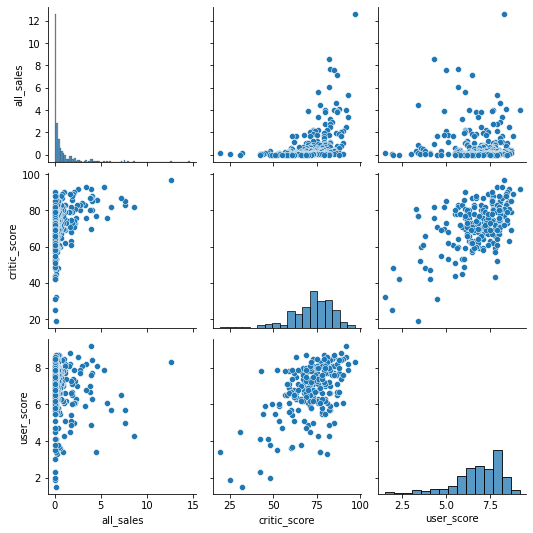

In [17]:
sns.pairplot(data_cut[data_cut['platform'] == "PS4"][['all_sales', 'critic_score', 'user_score']])


In [18]:
data_cut[data_cut['platform'] == "PS4"][['all_sales', 'critic_score', 'user_score']].corr()

,all_sales,critic_score,user_score
all_sales,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


Рассмотрим ещё пару платформ например Xbox360 и XboxOne.

,all_sales,critic_score,user_score
all_sales,1.000000,0.525723,-0.138445
critic_score,0.525723,1.000000,0.625309
user_score,-0.138445,0.625309,1.000000


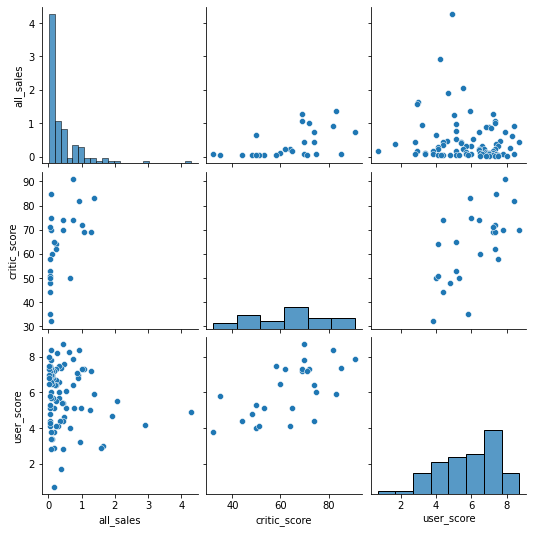

In [19]:
sns.pairplot(data_cut[data_cut['platform'] == "X360"][['all_sales', 'critic_score', 'user_score']])

data_cut[data_cut['platform'] == "X360"][['all_sales', 'critic_score', 'user_score']].corr()

,all_sales,critic_score,user_score
all_sales,1.000000,0.428677,-0.070384
critic_score,0.428677,1.000000,0.440977
user_score,-0.070384,0.440977,1.000000


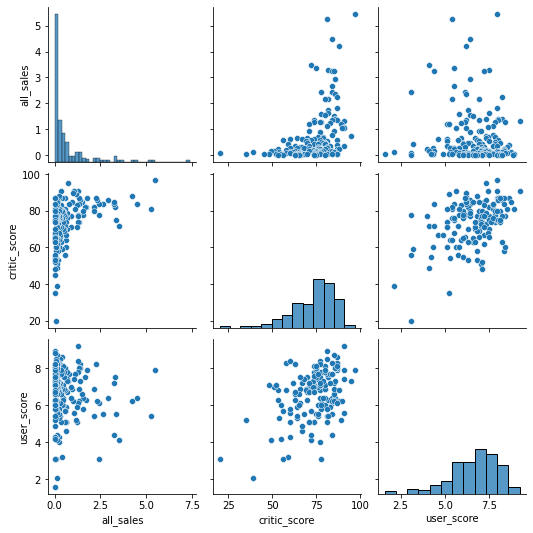

In [20]:
sns.pairplot(data_cut[data_cut['platform'] == "XOne"][['all_sales', 'critic_score', 'user_score']])

data_cut[data_cut['platform'] == "XOne"][['all_sales', 'critic_score', 'user_score']].corr()

Игры у которых высокие оценки критиков как правило продаются лучше, корреляция между all_sales и critic_score в районе 0.4 . С оценками пользователей наблюдается подобная тенденция, но горздо больше выбросов, данные корреляция говорят что зависимости и вовсе нет.

Посмотрим на общее распределение игр по жанрам. 

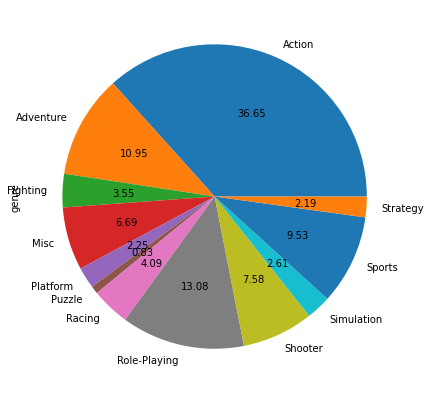

,all_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


In [21]:
pie_genre = data_cut.groupby('genre')['genre'].count()
pie_genre.plot(kind='pie', autopct="%.2f", figsize=(7,7))
plt.show()
sales_genre = data_cut.pivot_table(index='genre',values='all_sales',aggfunc=('sum')).sort_values('all_sales',ascending=False)
sales_genre

Самый больше продажи игр в жанре Action,но и производится этих игр на много больше чем остальных. Можно предположить что самые прибыльные игры в жанре Shooter так как произвидтся их относительно не много а в продажах они занимают 3 строчку, на обратные мысли наталкивает положение игр в жанре Adventure продажи совсем не велеки относительно количества призведённых игр.

## Шаг 4. Составим портрет пользователя каждого региона

Определим для пользователя каждого региона топ-5 популярных платформ

Топ 5 продаж по платформам в регионе na


,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


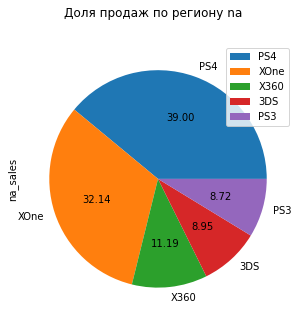

Топ 5 продаж по платформам в регионе eu


,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


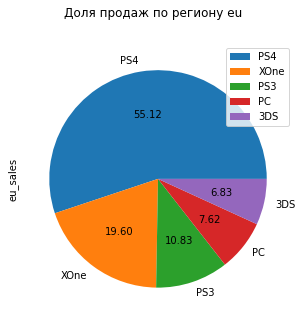

Топ 5 продаж по платформам в регионе jp


,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


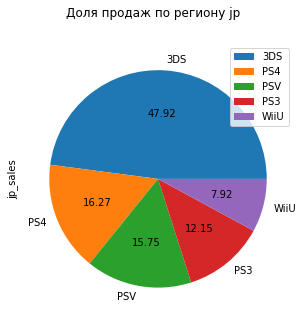

In [22]:
#Сделаем цик для автоматического формирования  нужных нам данных по регионам
for reg in ['na','eu', 'jp']:
    reg_platform = (data_cut.pivot_table(index='platform',values=reg+'_sales',aggfunc=('sum'))
                    .sort_values(reg+'_sales', ascending=False)
                   .head(5))
    print('Топ 5 продаж по платформам в регионе', reg)
    display(reg_platform)
    reg_platform.plot(kind='pie', subplots=True, autopct="%.2f", figsize=(5,5), title='Доля продаж по региону '+reg)
    plt.show()

В регионе NA популярна платформа Xbox360 , в европе PS3, в японии DS.

Определите для пользователя каждого региона топ-5 популярных жанров.

Топ 5 продаж по жанрам в регионе na


,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


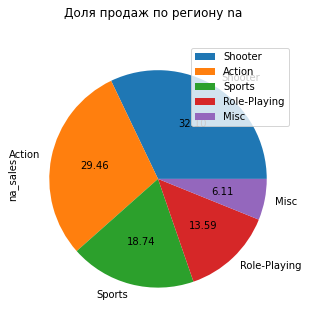

Топ 5 продаж по жанрам в регионе eu


,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


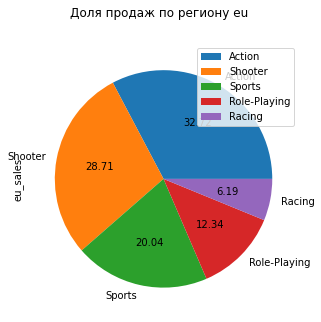

Топ 5 продаж по жанрам в регионе jp


,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


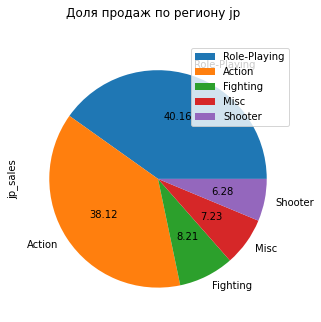

In [23]:
#Сделаем цик для автоматического формирования  нужных нам данных по регионам
for reg in ['na','eu', 'jp']:
    reg_genre = (data_cut.pivot_table(index='genre',values=reg+'_sales',aggfunc=('sum'))
                    .sort_values(reg+'_sales', ascending=False)
                   .head(5))
    print('Топ 5 продаж по жанрам в регионе', reg)
    display(reg_genre)
    reg_genre.plot(kind='pie', subplots=True, autopct="%.2f", figsize=(5,5), title='Доля продаж по региону '+reg)
    plt.show()

В Европе и америки вкусы совпадают отличаются лиш последние строчки топа, тогда как в японии горазда большей популярностью обладают игры в жанре РПГ, спортивные симуляторы вообще не попали в топ зато попали игры в жанре файтинг.

Проверим влияет ли рейтинг ESRB на продажи по регионам

In [24]:
#Для начала заменим пропуски в рейтинге на "missing" что бы не потерять данные с пропущеным рейтенгом
data_cut['rating'] = data_cut['rating'].fillna('missing')



/tmp/ipykernel_48/283407007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cut['rating'] = data_cut['rating'].fillna('missing')


Продаж по рейтенгу ESRB в регионе na


,na_sales
rating,
M,96.42
missing,64.72
E,50.74
T,38.95
E10+,33.23


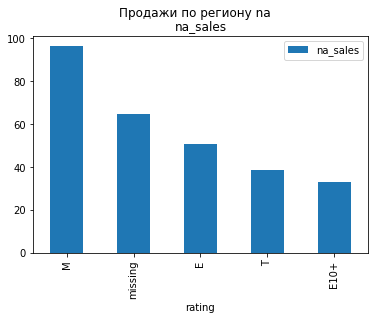

Продаж по рейтенгу ESRB в регионе eu


,eu_sales
rating,
M,93.44
missing,58.95
E,58.06
T,34.07
E10+,26.16


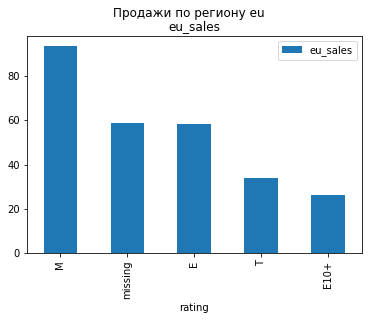

Продаж по рейтенгу ESRB в регионе jp


,jp_sales
rating,
missing,56.90
T,14.78
E,8.94
M,8.01
E10+,4.46


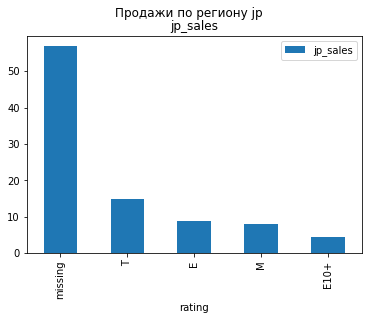

In [25]:
#Сделаем цик для автоматического формирования  нужных нам данных по регионам
for reg in ['na','eu', 'jp']:
    reg_esrb = (data_cut.pivot_table(index='rating',values=reg+'_sales',aggfunc=('sum'))
                    .sort_values(reg+'_sales', ascending=False))
    
    print('Продаж по рейтенгу ESRB в регионе', reg)
    display(reg_esrb)
    reg_esrb.plot(kind='bar', subplots=True, title='Продажи по региону '+reg)
    plt.show()

В Америке и Европе лидируют игры с рейтингом M - "Для взрослы" что можно объяснить тем что взрослые более платежеспособны. На втором месте игры с без рейтинга .В Японии же на первом месте игры без рейтенга что связано с тем что игры данного региона за частую не выходят на другие рынки, а по этому и не получают возрастной рейтинг. 


## Шаг 5. Проверка гипотезы

H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
H1 - Средние пользовательские рейтинги платформ Xbox One и PC отличаются

In [26]:
#формируем новые dataframe с интересующими нас данными , отбросив пропуски
xbox_rating = data_cut[data_cut['platform'] == 'XOne']['user_score'].dropna()
pc_rating = data_cut[data_cut['platform'] == 'PC']['user_score'].dropna()

#вызов метода для проверки гипотезы
results = st.ttest_ind(xbox_rating, pc_rating, equal_var = False)
#Уровень значимости
alpha = 0.05

print('p-value:',results.pvalue)
#выводим результат 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу ')

p-value: 0.11601398086668938
Не получилось отвергнуть нулевую гипотезу 


H0 - Средние пользовательские рейтинги жанров Action  и Sports  разные.

In [27]:
#формируем новые dataframe с интересующими нас данными , отбросив пропуски
action_rating = data_cut[data_cut['genre'] == 'Action']['user_score'].dropna()
sports_rating = data_cut[data_cut['genre'] == 'Sports']['user_score'].dropna()

#вызов метода для проверки гипотезы
results = st.ttest_ind(action_rating, sports_rating, equal_var = False)

#Уровень значимости
alpha = 0.05

print('p-value:',results.pvalue)
#выводим результат 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу ')

p-value: 1.1825550382646265e-14
Отвергаем нулевую гипотезу


## Шаг 6. Общий вывод

С 1995 г. наблюдается рост количества игр и ещё больший рост продаж , однако в 2009 тенденция меняется в обратную сторону, на данный момент продажи на всех платформах падают. 

Наиболее актуальные на данный момент платформы PS4, Xone, 3DS. Однака у каждой платформы были своих хиты с хорошими продажами.

Отзывы критиков как правило влияют на продажи игр, скорей всего это из за того что они печатаются в игровых СМИ и к ним прислушиваются множество игроков, а ещё не надо забывать что чаще всего обзоры от критиков выходят до старта продаж, что сильно влияет на продаже в первоем время после выхода. Оценки пользователей же вовсе не влияют на продажи.

Самые большие продажи игр в жанрек Action их и чаще всего производят, Shooter же выглядят очень перспективно при не сильно частом выходе новых игр у них хорошие продажи.

В зависмости от региона меняются и предпочтения как в платформах так и в жанрах, так например в японии очень популярны РПГ и в пятёрку попали файтенги, в европе и америки значительных различий в любимых жанрах нету.

В Амрике наибольшей популярностью пользуются платформы PS4 и XboxOne, суммарные продажи составляют более 71%.
В Европе болеше всего продаются игры на платформа PS4 более 55%, на втором месте XboxOne 19%.Так же это единственный регион где в топ-5 попали PC игры .
в Японии же самой популярной платформой является 3DS 47% , дальше в сопастовимых долях идут PS4, PSV, PS3, WiiU.

В Америке и Европе лидирующие места занимают жанры Action и Shooter в обоих регионах продажи составили более 60%,на втором месте игры жанра Sports, далее с сопоставимыми долями идут Role-Playing,	Misc, Racing.
В Японии преобладают игры в жанре Role-Playing 40% и Action	38%, далее идут намного менее заначимы жанры Fighting, Misc, Shooter.

В значительной мере на продажи игр влияет их возрастной рейтенг , так в Европе и Америке более популярны игры для взрослых, как мне кажется в виду большей платежеспособности, на втором мете игры без рейтинга. 
В Японии же исследовать данный вопрос до конца не возможно ибо нету данных от их рейтенгового агенства а именно Computer Entertainment Rating Organization.

Гипотезы: 
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые: Гипотеза не была опровергнута.
Средние пользовательские рейтинги жанров Action и Sports разные: Гипотеза отвергнута.
